In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Task 1: Some cleaning

In [125]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [127]:
df_filled = df.copy()


# Age filling in the median value
# Embarked is filled in with the mode since it is categorical 
# Unknown to Cabin is just creating an extra category for the data
df_filled.fillna({ "Age": df_filled["Age"].median(), 
                  "Embarked": df_filled["Embarked"].mode(),
                  "Cabin":"Unknown"}, inplace=True)


### Task 2: Descriptive statistics

In [128]:
df_filled.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [129]:
df_filled.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
dtype: int64

In [131]:
# Fare and Age will be taken as continuous data because they are integers are genrally have some variation between them
# Survived, Pclass, Sex, SibSp, Parch are intgers but have enter categorial or ordinal properties
continuous_columns = ["Age", "Fare" ]
categorical_columns = ["Survived", "Pclass", "Sex", "SibSp", "Parch"]



df_con = df_filled.loc[:, continuous_columns].copy()
df_cat =  df_filled.loc[:, categorical_columns].copy()


# converting Sex from string to intgers
df_cat["Sex"] = LabelEncoder().fit_transform(df_cat["Sex"])

df_con.describe()

,Age,Fare
count,891.000000,891.000000
mean,29.361582,32.204208
std,13.019697,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [132]:
# calcuating variability
# This includes range, std_dev, coeff_variation, IQR (quantile), sem (standard error of mean)

variability_measure = {
    "variance": df_con.std(),
    "range" : df_con.max() - df_con.min(),
    "coeff_variation" : df_con.std() / df_con.mean(),
    "IQR" : df_con.quantile(0.75),
    "sem": df_con.sem(),
    "skewness": df_con.skew(),
    "kurtosis": df_con.kurt()
}

pd.DataFrame.from_dict(variability_measure).T

,Age,Fare
variance,13.019697,49.693429
range,79.580000,512.329200
coeff_variation,0.443426,1.543073
IQR,35.000000,31.000000
sem,0.436176,1.664792
skewness,0.510245,4.787317
kurtosis,0.993871,33.398141


In [133]:
# Frequnecy Table
# ["Survived", "Pclass", "Sex", "SibSp", "Parch"]
freq_table = {
    "Survived": df_cat["Survived"]. value_counts(),
    "Pclass": df_cat["Pclass"]. value_counts().sort_values(ascending=False),
    "Sex": df_cat["Sex"]. value_counts(),
    "SibSp": df_cat["SibSp"].value_counts().sort_values(ascending=False),
    "Parch": df_cat["Parch"].value_counts().sort_values(ascending=False),
}

for class_name, inform in freq_table.items():
    print(f"Frequency Table for: {class_name}")
    print(inform)

Frequency Table for: Survived
Survived
0    549
1    342
Name: count, dtype: int64
Frequency Table for: Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Frequency Table for: Sex
Sex
1    577
0    314
Name: count, dtype: int64
Frequency Table for: SibSp
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Frequency Table for: Parch
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [134]:
from IPython.display import display


def displayMatrix(table_matrix, func):
    for i in table_matrix.values():
        func(i)

# ["Survived", "Pclass", "Sex", "SibSp", "Parch"]
# contingency tables compare two categorical features from eachother
contingency_table_matrix = {
    "table1": pd.crosstab(df_cat["Survived"], df_cat["Pclass"]),
    "table2": pd.crosstab(df_cat["Survived"], df_cat["Sex"]), 
    "table3": pd.crosstab(df_cat["Survived"], df_cat["SibSp"]), 
    "table4": pd.crosstab(df_cat["Survived"], df_cat["Parch"]), 
    "table5": pd.crosstab(df_cat["Pclass"], df_cat["Sex"]), 
    "table6": pd.crosstab(df_cat["Pclass"], df_cat["SibSp"]),
    "table7": pd.crosstab(df_cat["Pclass"], df_cat["SibSp"]),
    "table8": pd.crosstab(df_cat["SibSp"], df_cat["Parch"]),
    "table9": pd.crosstab(df_cat["SibSp"], df_cat["Sex"]),
    "table9": pd.crosstab(df_cat["Sex"], df_cat["Parch"]),        
}

displayMatrix(contingency_table_matrix, display)


Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Sex,0,1
Survived,,
0,81,468
1,233,109


SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


Sex,0,1
Pclass,,
1,94,122
2,76,108
3,144,347


SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,137,71,5,3,0,0,0
2,120,55,8,1,0,0,0
3,351,83,15,12,18,5,7


SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,137,71,5,3,0,0,0
2,120,55,8,1,0,0,0
3,351,83,15,12,18,5,7


Parch,0,1,2,3,4,5,6
SibSp,,,,,,,
0,537,38,29,1,1,2,0
1,123,57,19,3,3,3,1
2,16,7,4,1,0,0,0
3,2,7,7,0,0,0,0
4,0,9,9,0,0,0,0
5,0,0,5,0,0,0,0
8,0,0,7,0,0,0,0


Parch,0,1,2,3,4,5,6
Sex,,,,,,,
0,194,60,49,4,2,4,1
1,484,58,31,1,2,1,0


### Task 3: EDA

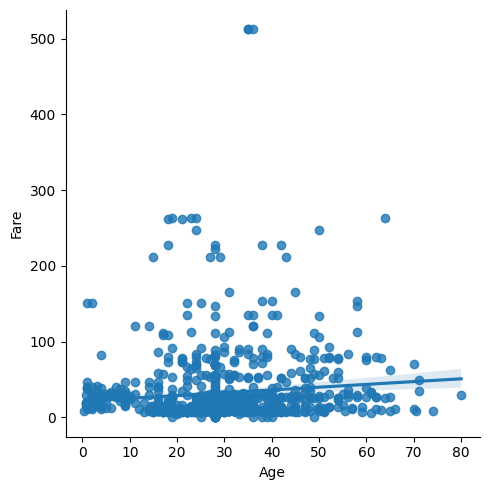

In [140]:

#fig, axs = plt.subplots(2, 5, figsize=(12, 4))
sns.lmplot(x="Age", y="Fare", data=df_con)

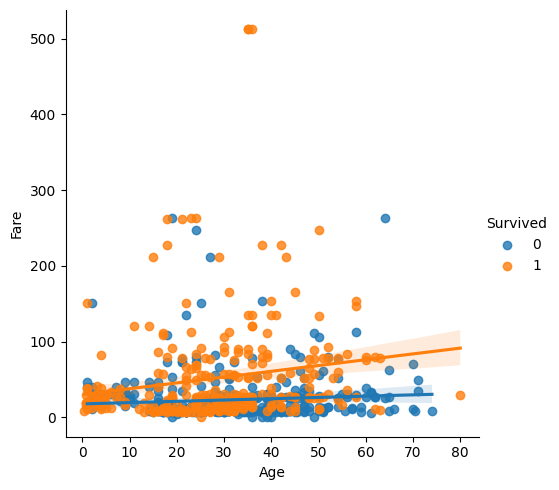

In [148]:
sns.lmplot(x="Age", y="Fare", hue="Survived", data=df)

<Axes: xlabel='Age', ylabel='Fare'>

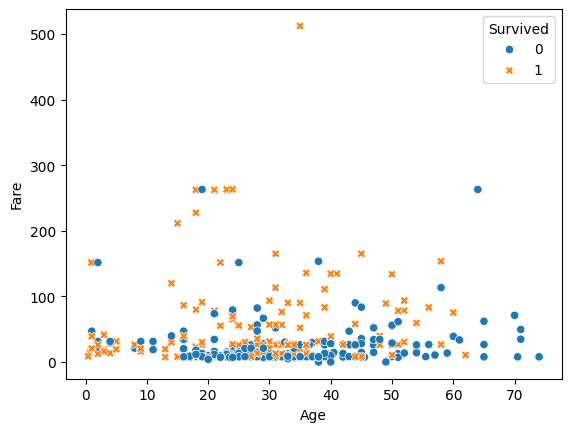

In [146]:
sns.scatterplot(x="Age", y="Fare", style="Survived", hue="Survived" ,data=df.sample(frac=0.5))

<Axes: xlabel='Age', ylabel='Fare'>

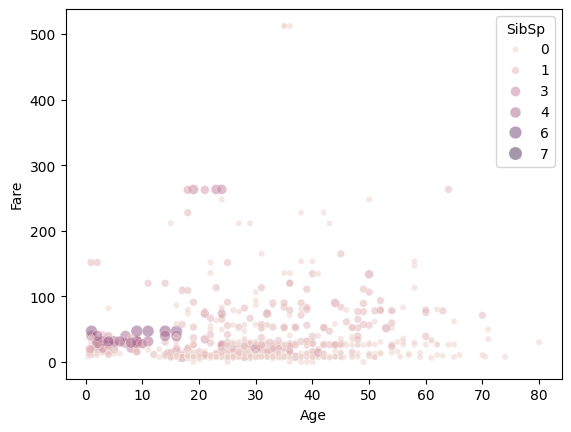

In [154]:
# bubble plot
min, max = 20, 100
sns.scatterplot(
    data=df,
    x="Age",
    y="Fare",
    size="SibSp",
    hue = "SibSp",
    alpha=0.5,
    sizes=(min, max),
)